**TRABALHO PRATICO 1** 

**Franci Rrapi (UFMG - 2021/1)**

**INTRODUCTION**

This homework deals with the CoppeliaSim robotic tool to put in practice some tools and basic concepts of spatial
description and transformations in robotics. To do this I used a scene made by me and some Python functions.
To run the software is very simple! Just execute each cell one at a time and when above the cell is writed "CoppeliaSim needed first!" it means that before running the cell the CoppeliaSim simulation must be started.
All the resources (like images and other code) and results are located in the same directory where this notebook is located.

**IMPLEMENTATION and TESTS**

Below is the implementation of this Homework and you can find also the image tests made (they are also saved and available in the same folder of the notebook)

In [1]:
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import math

In [3]:
def Rz(theta):
  
    return np.array([[  np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta),  np.cos(theta), 0 ],
                      [ 0            ,  0            , 1 ]])

def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  

def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


# Apenas para visualização de um referencial no plano
def plot_frame(Porg, R, c=['r', 'g']):
    
    axis_size = 3.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
        
    # X
    plt.quiver(*Porg[:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)

**Ex. 1**

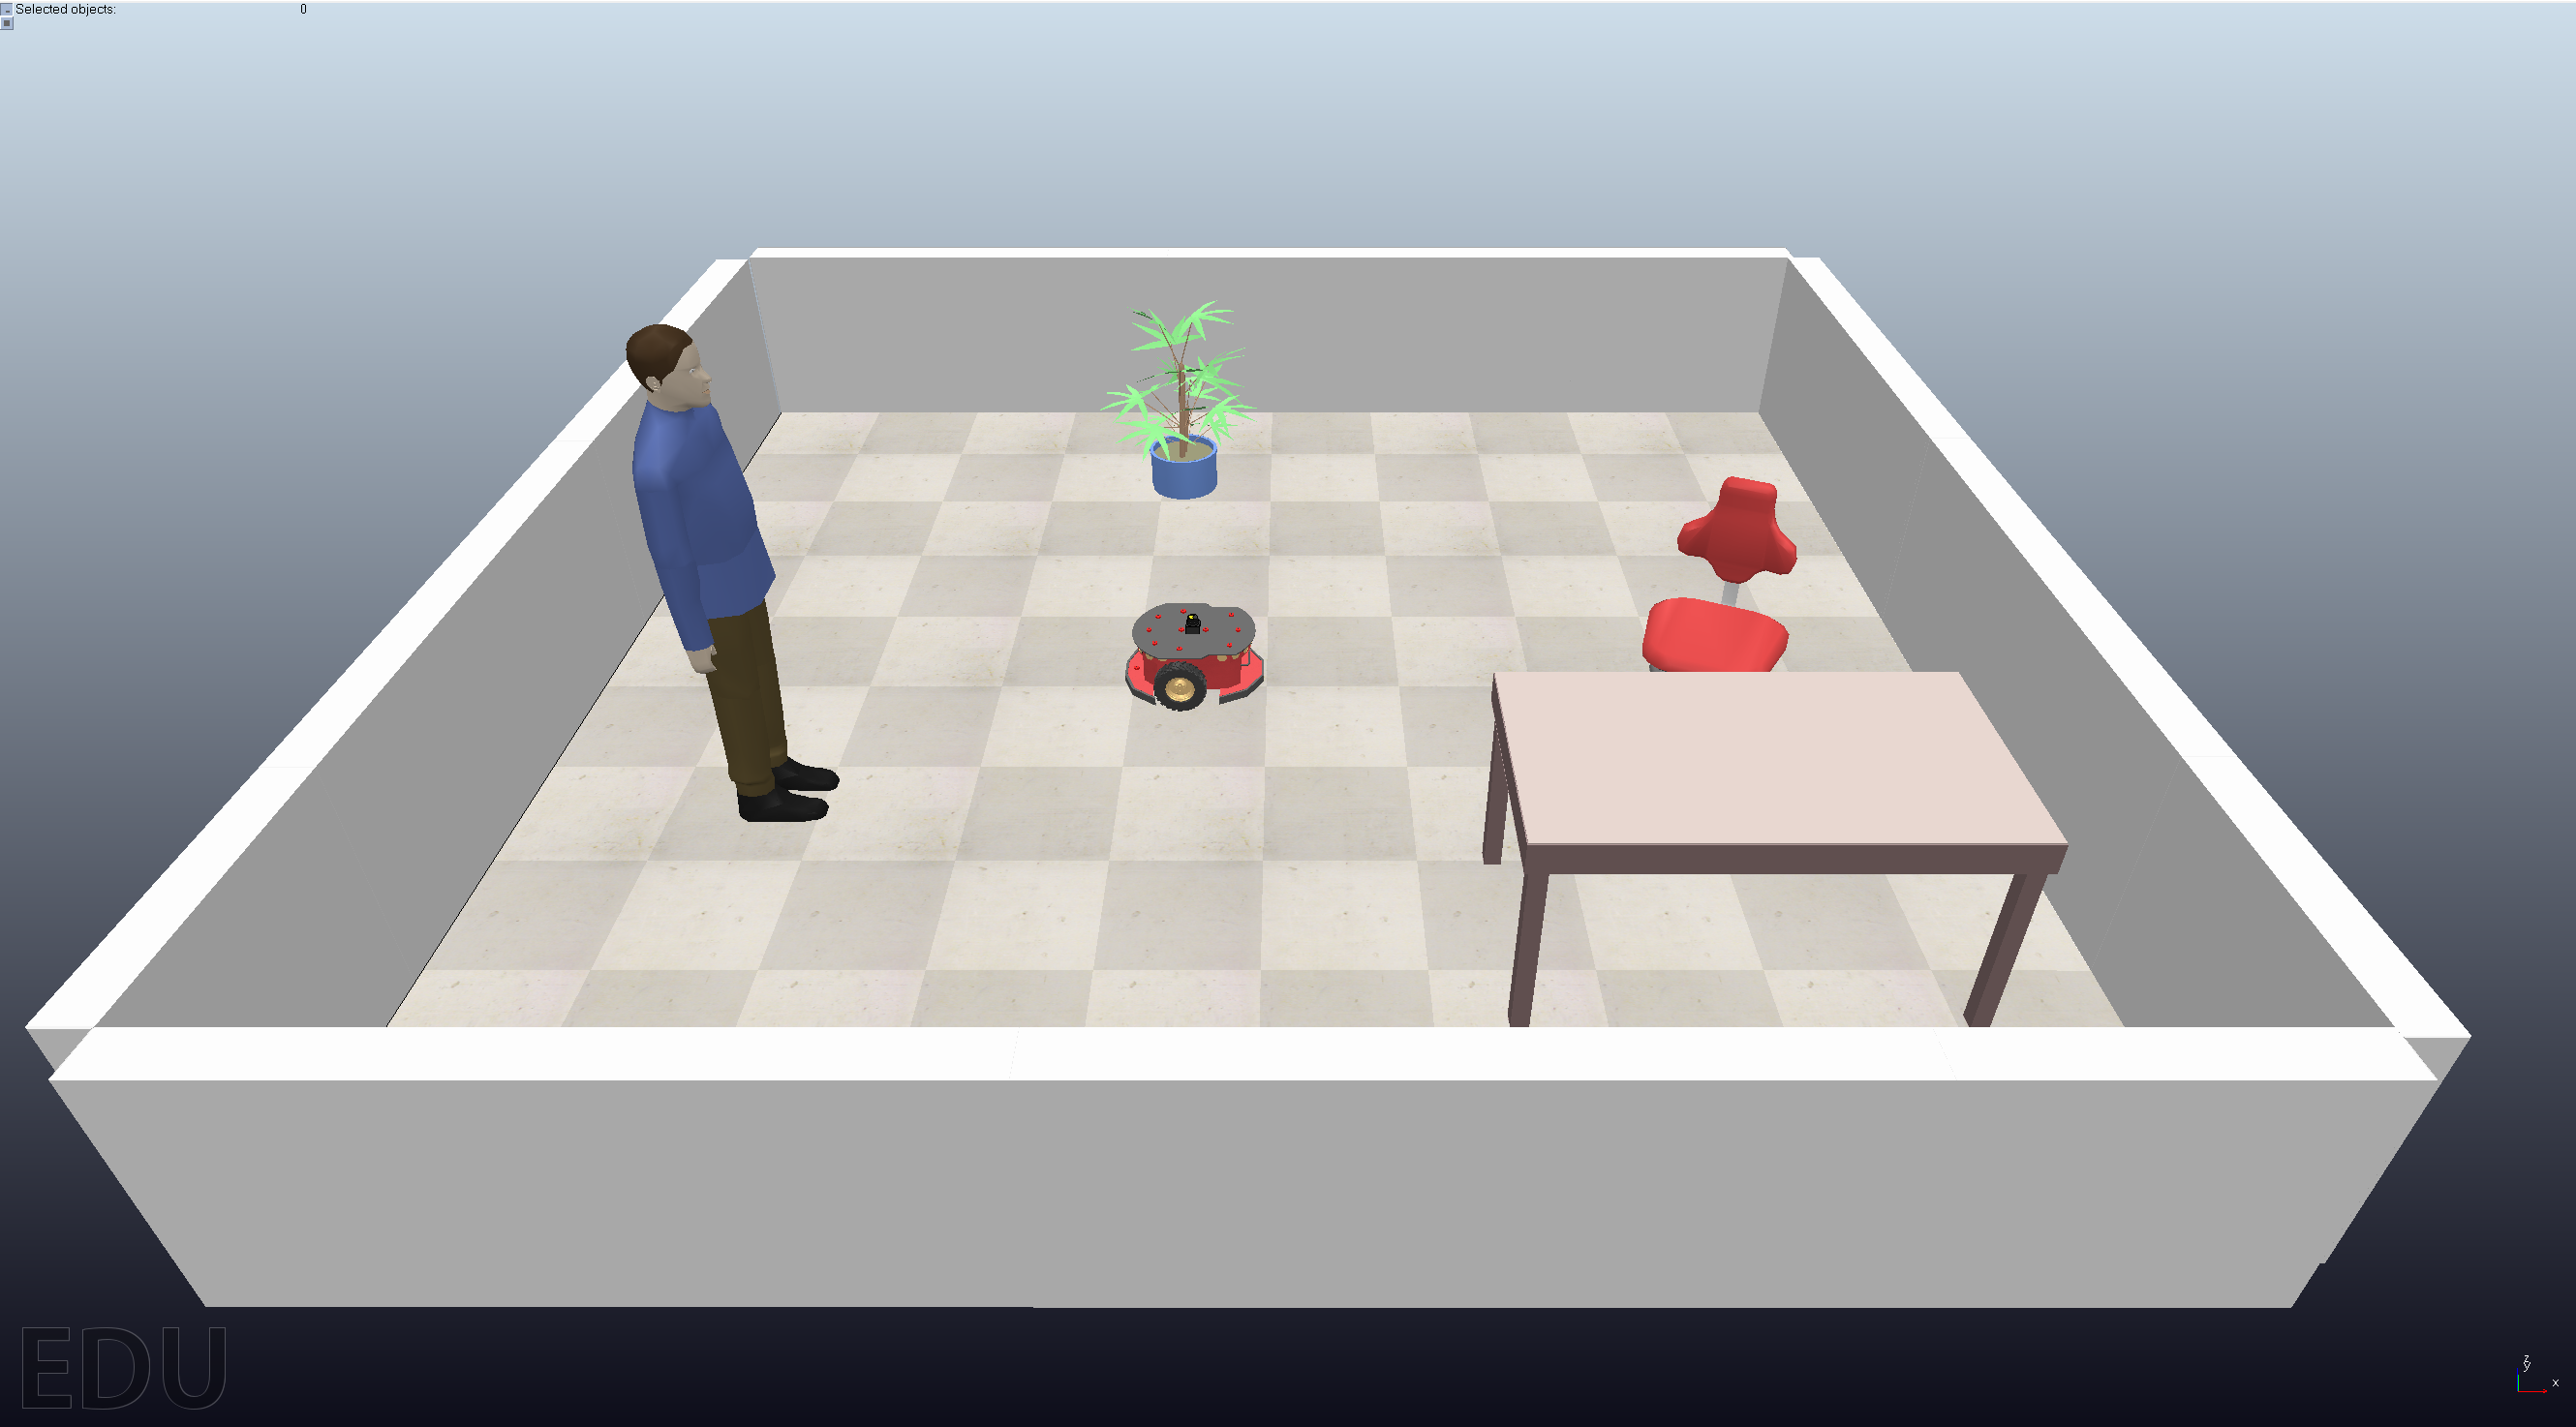

**EX. 2**

In [4]:
def getObjectsPositionsAndOrientations():
#     this function connects with the simulation and calculates some scene informations. It returns an array 
#     with 4 elements (if the connection fails, it returns an empty array) 
#     Input: None
#     Output: [] or [global_positions, positions, global_orientations, orientations]
#       global_positions: the positions of all objects in scene and robot wrt global frame
#       positions: the positions of all objects in scene wrt robot
#       global_orientations: the orientations of all objects in scene and robot wrt global frame
#       orientations: the orientations of all objects in scene wrt robot

    print ('Program started')
    res = []
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

    if clientID!=-1:
        print ('Connected to remote API server')

        # Iniciando a simulação
        # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
        # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

        # Handle para o ROBÔ    
        robotname = 'Pioneer_p3dx'
        returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)

        #Human handle
        human_name = 'Bill'
        returnCode, humanHandle = sim.simxGetObjectHandle(clientID, human_name, sim.simx_opmode_oneshot_wait)

        #Chair handle
        chair_name = 'swivelChair'
        returnCode, chairHandle = sim.simxGetObjectHandle(clientID, chair_name, sim.simx_opmode_oneshot_wait)

        #Table handle
        table_name = 'customizableTable'
        returnCode, tableHandle = sim.simxGetObjectHandle(clientID, table_name, sim.simx_opmode_oneshot_wait)

        #Plant handle
        plant_name = 'indoorPlant'
        returnCode, plantHandle = sim.simxGetObjectHandle(clientID, plant_name, sim.simx_opmode_oneshot_wait)

        # Object positions
        positions = []
        global_positions = []

        objects = ["human", "chair", "table", "plant"]

        returnCode, robot_pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Robot global position: ', robot_pos)
        global_positions.append(robot_pos)
        returnCode, human_pos = sim.simxGetObjectPosition(clientID, humanHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Human global position: ', human_pos)
        global_positions.append(human_pos)
        returnCode, chair_pos = sim.simxGetObjectPosition(clientID, chairHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Chair global position: ', chair_pos)
        global_positions.append(chair_pos)
        returnCode, table_pos = sim.simxGetObjectPosition(clientID, tableHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Table global position: ', table_pos)
        global_positions.append(table_pos)
        returnCode, plant_pos = sim.simxGetObjectPosition(clientID, plantHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Plant global position: ', plant_pos)
        global_positions.append(plant_pos)
        returnCode, human_pos_robot = sim.simxGetObjectPosition(clientID, humanHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Human position wrt robot: ', human_pos_robot)
        positions.append(human_pos_robot)
        returnCode, chair_pos_robot = sim.simxGetObjectPosition(clientID, chairHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Chair position wrt robot: ', chair_pos_robot)
        positions.append(chair_pos_robot)
        returnCode, table_pos_robot = sim.simxGetObjectPosition(clientID, tableHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Table position wrt robot: ', table_pos_robot)
        positions.append(table_pos_robot)
        returnCode, plant_pos_robot = sim.simxGetObjectPosition(clientID, plantHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Plant position wrt robot: ', plant_pos_robot)
        positions.append(plant_pos_robot)

        #Object orientations
        orientations = []
        global_orientations = []

        returnCode, robot_orient = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Robot global orientation: ', robot_orient)
        global_orientations.append(robot_orient)
        returnCode, human_orient = sim.simxGetObjectOrientation(clientID, humanHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Human global orientation: ', human_orient)
        global_orientations.append(human_orient)
        returnCode, chair_orient = sim.simxGetObjectOrientation(clientID, chairHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Chair global orientation: ', chair_orient)
        global_orientations.append(chair_orient)
        returnCode, table_orient = sim.simxGetObjectOrientation(clientID, tableHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Table global orientation: ', table_orient)
        global_orientations.append(table_orient)
        returnCode, plant_orient = sim.simxGetObjectOrientation(clientID, plantHandle, -1, sim.simx_opmode_oneshot_wait)        
        #print('Plant global orientation: ', plant_orient)
        global_orientations.append(plant_orient)
        returnCode, human_orient_robot = sim.simxGetObjectOrientation(clientID, humanHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Human orientation wrt robot: ', human_orient_robot)
        orientations.append(human_orient_robot)
        returnCode, chair_orient_robot = sim.simxGetObjectOrientation(clientID, chairHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Chair orientation wrt robot: ', chair_orient_robot)
        orientations.append(chair_orient_robot)
        returnCode, table_orient_robot = sim.simxGetObjectOrientation(clientID, tableHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Table orientation wrt robot: ', table_orient_robot)
        orientations.append(table_orient_robot)
        returnCode, plant_orient_robot = sim.simxGetObjectOrientation(clientID, plantHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
        #print('Plant orientation wrt robot: ', plant_orient_robot)
        orientations.append(plant_orient_robot)

        #print("Positions: {} \nLen: {}".format(positions, len(positions)))
        #print("Global Positions: {} \nLen: {}".format(global_positions, len(global_positions)))
        #print("Orientations: {} \nLen: {}".format(orientations, len(orientations)))
        #print("Global Orientations: {} \nLen: {}".format(global_orientations, len(global_orientations)))

        # Parando a simulação     
        sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         

        # Now close the connection to CoppeliaSim:
        sim.simxFinish(clientID)
        res = [global_positions, positions, global_orientations, orientations]

    else:
        print ('Failed connecting to remote API server')
        print ('Program ended')
        return res
    print ('Program ended')
    return res

In [5]:
####################################################################################
#                                                                                  #
#                             CoppeliaSim needed first!                            #
#                                                                                  #
####################################################################################

scene_info = getObjectsPositionsAndOrientations()
if scene_info == []:
    print("ERROR: Start simulation!!!")
else:
    global_positions, positions, global_orientations, orientations = scene_info[0], scene_info[1], scene_info[2], scene_info[3]

Program started
Connected to remote API server
Program ended


In [6]:
objects = ["human", "chair", "table", "plant"]

In [7]:
def plotCoordinateSystem(scene_info, title):
#     this function plots the coordinate system of the model of the simulation
#     Input: 
#       scene_info: an array made of [global_positions, positions, global_orientations, orientations]
#       title: string useful for print and save images
#     Output: None

    global_positions, positions, global_orientations, orientations = scene_info[0], scene_info[1], scene_info[2], scene_info[3]
    plt.figure()
    plt.title("{} Coordinate systems".format(title))
    for i in range(len(global_positions)):
        # Frame for each object
        Porg = np.array(global_positions[i])
        alpha, beta, gamma = global_orientations[i]
        R = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
        plot_frame(Porg, R)

    plt.axis('scaled')
    plt.axis((-5, 5, -5, 5))
    plt.savefig("{}: coordinate_systems.png".format(title))

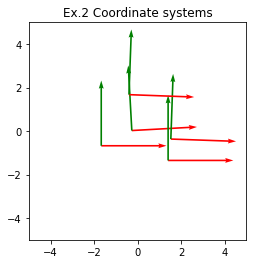

In [8]:
plotCoordinateSystem(scene_info, "Ex.2")

**EX. 3**

In [9]:
def plotHomogeneousTransformationsAndReferences(scene_info, objects, title):
#     this function calculates the Homogeneous Transformation between each object in the scene wrt the robot and
#     it plots the references between them. 
#     Input: 
#       scene_info: an array made of [global_positions, positions, global_orientations, orientations]
#       objects: list of the objects name in the scene
#       title: string useful for print and save images
#     Output: None

    global_positions, positions, global_orientations, orientations = scene_info[0], scene_info[1], scene_info[2], scene_info[3]
    for i in range(len(objects)):
        pb = np.array([3, 7, 0, 1])
        # Homogeneous transformation for each object wrt to the robot
        obj_name = objects[i]
        pa_borg = np.array(positions[i])
        alpha, beta, gamma = orientations[i]
        #Rab = Rz(np.deg2rad(theta))
#         Rab = Rx(alpha) @ Ry(beta) @ Rz(gamma)
        Rab = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
        #plot_frame(pa_borg, Rab)

        # Concatena o vetor origem ao final (coluna)
        Tab = np.column_stack((Rab, pa_borg))
        # Concatena o vetor auxiliar embaixo (linha)
        aux = np.array([0, 0, 0, 1])
        Tab = np.row_stack((Tab, aux))

        pa = Tab @ pb

        print("T from {} to robot:\n{}".format(obj_name, Tab))
        # Plotando os referenciais
        plt.figure()
        plt.title("{} {} reference.png".format(title, obj_name))
        plot_frame(pa_borg, Rab, ['g', 'g'])

        # Vetor Pa_borg
        pa_org = np.array([0, 0])
        plt.quiver(*pa_org[:2], *pa_borg[:2], color='g', angles='xy', scale_units='xy', scale=1)

        # Vetor Pb
        pb_aux = Rab @ pb[:3]
        plt.quiver(*pa_borg[:2], *pb_aux[:2], color='g', angles='xy', scale_units='xy', scale=1)

        # Vetor Pa
        plt.quiver(*pa_org[:2], *pa[:2], color='b', angles='xy', scale_units='xy', scale=1)

        plt.plot(pa[0], pa[1], 'o', color='b')

        plt.axis('scaled')
        plt.axis((-10, 10, -10, 10))
        plt.savefig("{}: {}_reference.png".format(title, obj_name))

T from human to robot:
[[ 9.98497230e-01  5.48021916e-02  3.79167763e-05  1.40555513e+00]
 [-5.48021916e-02  9.98497231e-01 -9.24951226e-07  7.00086951e-01]
 [-3.79104855e-05 -1.15436121e-06  9.99999999e-01 -1.41734719e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from chair to robot:
[[ 9.99803948e-01 -1.98006027e-02  3.89617915e-05 -1.79355276e+00]
 [ 1.98006028e-02  9.99803949e-01 -9.12619347e-07  3.91464472e-01]
 [-3.89360826e-05  1.68390738e-06  9.99999999e-01  3.25991601e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from table to robot:
[[ 9.98497230e-01  5.48021833e-02  4.49631082e-05 -1.66783571e+00]
 [-5.48021833e-02  9.98497231e-01 -1.27344047e-06  1.37484980e+00]
 [-4.49653263e-05 -1.19254971e-06  9.99999999e-01  5.65296292e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from plant to robot:
[[ 9.99832960e-01 -1.82770474e-02  4.02126434e-05  1.30716741e-01]
 [ 1.82770475e-02  9.99832961e-01 

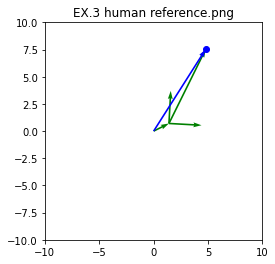

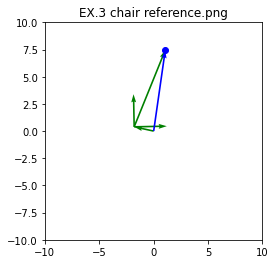

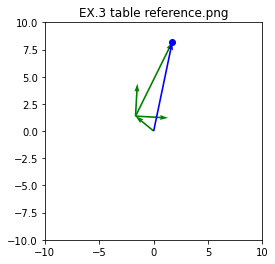

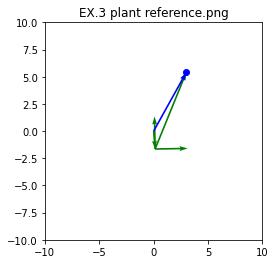

In [10]:
plotHomogeneousTransformationsAndReferences(scene_info, objects, "EX.3")

**EX. 4**

SCENE 1

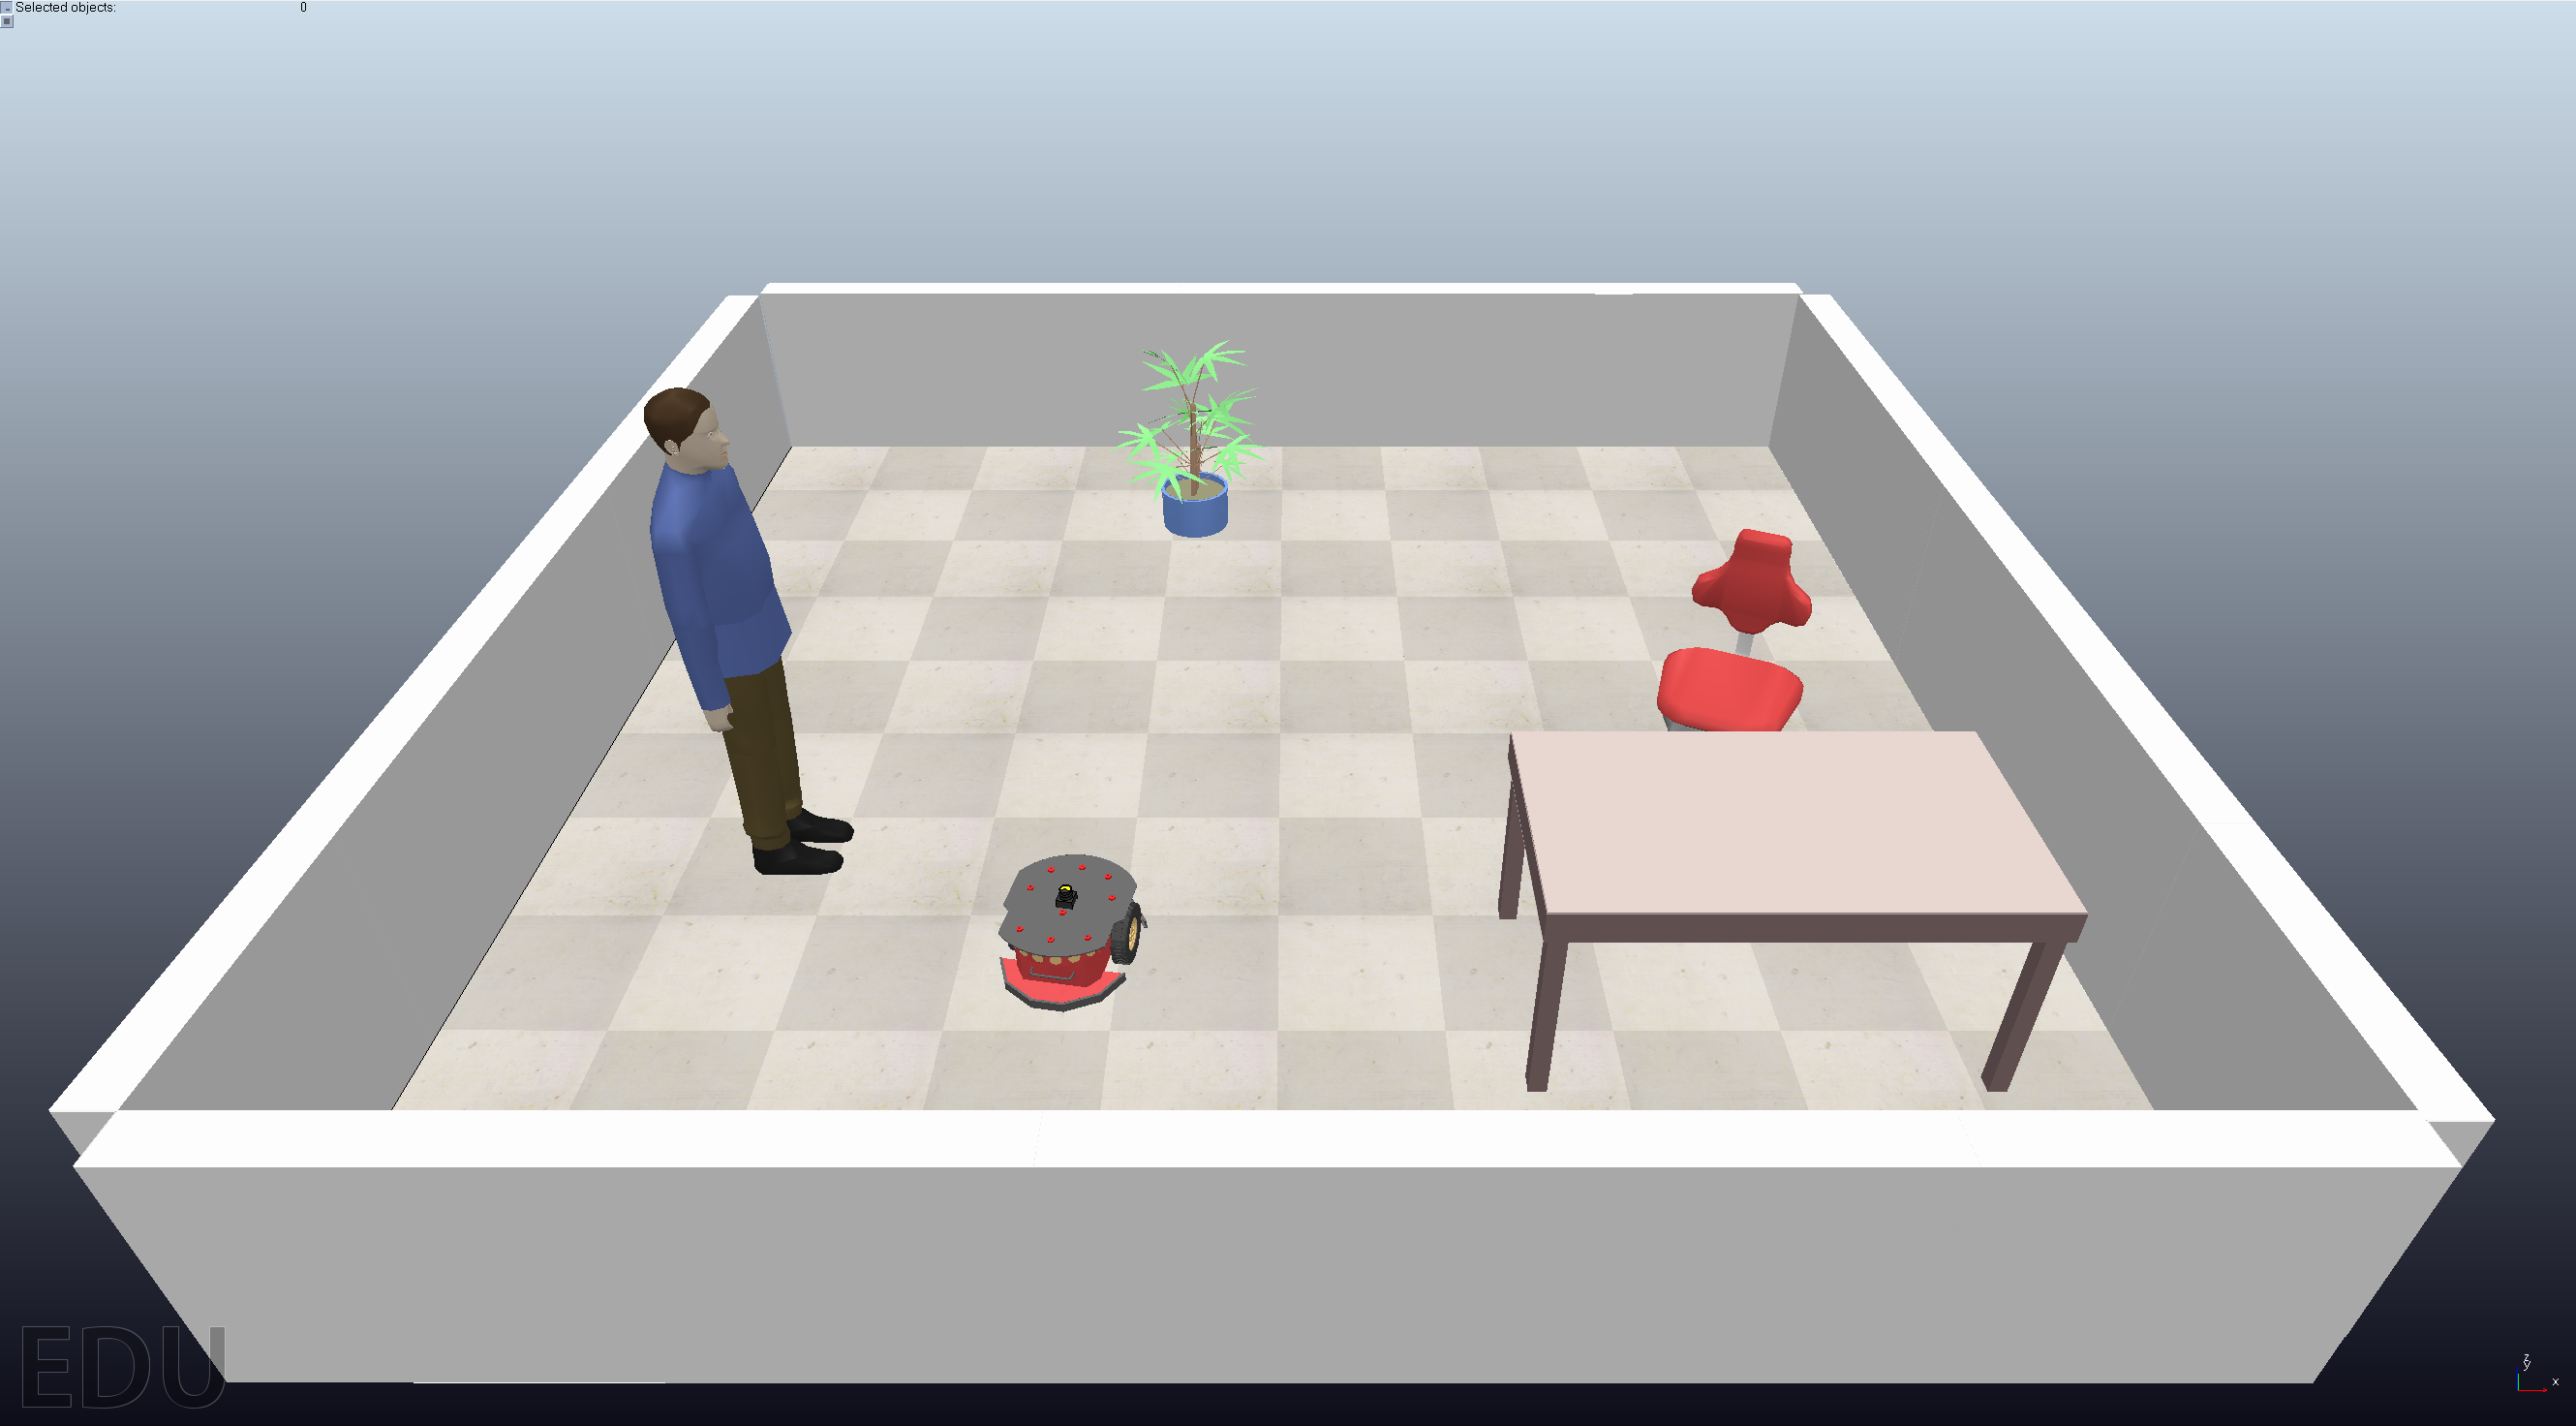

In [11]:
####################################################################################
#                                                                                  #
#                             CoppeliaSim needed first!                            #
#                                                                                  #
####################################################################################

scene_info = getObjectsPositionsAndOrientations()
if scene_info == []:
    print("ERROR: Start simulation!!!")
else:
    global_positions, positions, global_orientations, orientations = scene_info[0], scene_info[1], scene_info[2], scene_info[3]

Program started
Connected to remote API server
Program ended


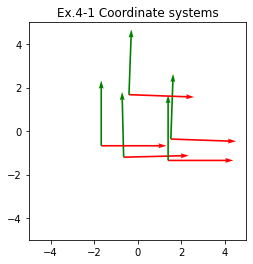

In [12]:
plotCoordinateSystem(scene_info, "Ex.4-1")

T from human to robot:
[[ 9.99703147e-01  2.43642228e-02  5.38487344e-05  3.38209033e-01]
 [-2.43642228e-02  9.99703148e-01 -1.49613343e-06  1.10609829e+00]
 [-5.38692015e-05  1.83706735e-07  9.99999999e-01 -1.39577419e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from chair to robot:
[[ 9.98736982e-01 -5.02437798e-02  5.43322085e-05  1.19947338e+00]
 [ 5.02437800e-02  9.98736984e-01 -1.29738039e-06 -1.99181736e+00]
 [-5.41984008e-05  4.02559730e-06  9.99999999e-01  3.18149328e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from table to robot:
[[ 9.99703148e-01  2.43641667e-02  5.44584015e-05  2.10071802e-01]
 [-2.43641666e-02  9.99703150e-01 -1.32895580e-06 -2.03947949e+00]
 [-5.44746144e-05  1.72772797e-09  9.99999999e-01  5.60537457e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from plant to robot:
[[ 9.98812381e-01 -4.87219065e-02  5.47429268e-05  2.87405062e+00]
 [ 4.87219066e-02  9.98812383e-01 

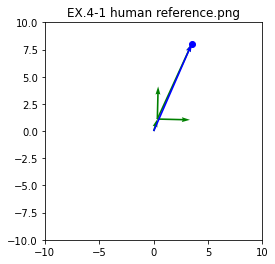

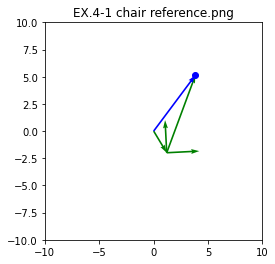

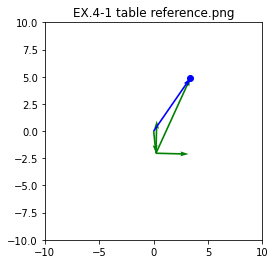

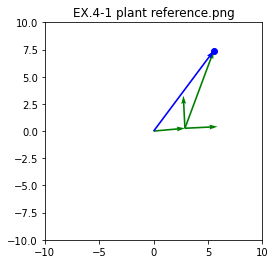

In [13]:
plotHomogeneousTransformationsAndReferences(scene_info, objects, "EX.4-1")

SCENE 2

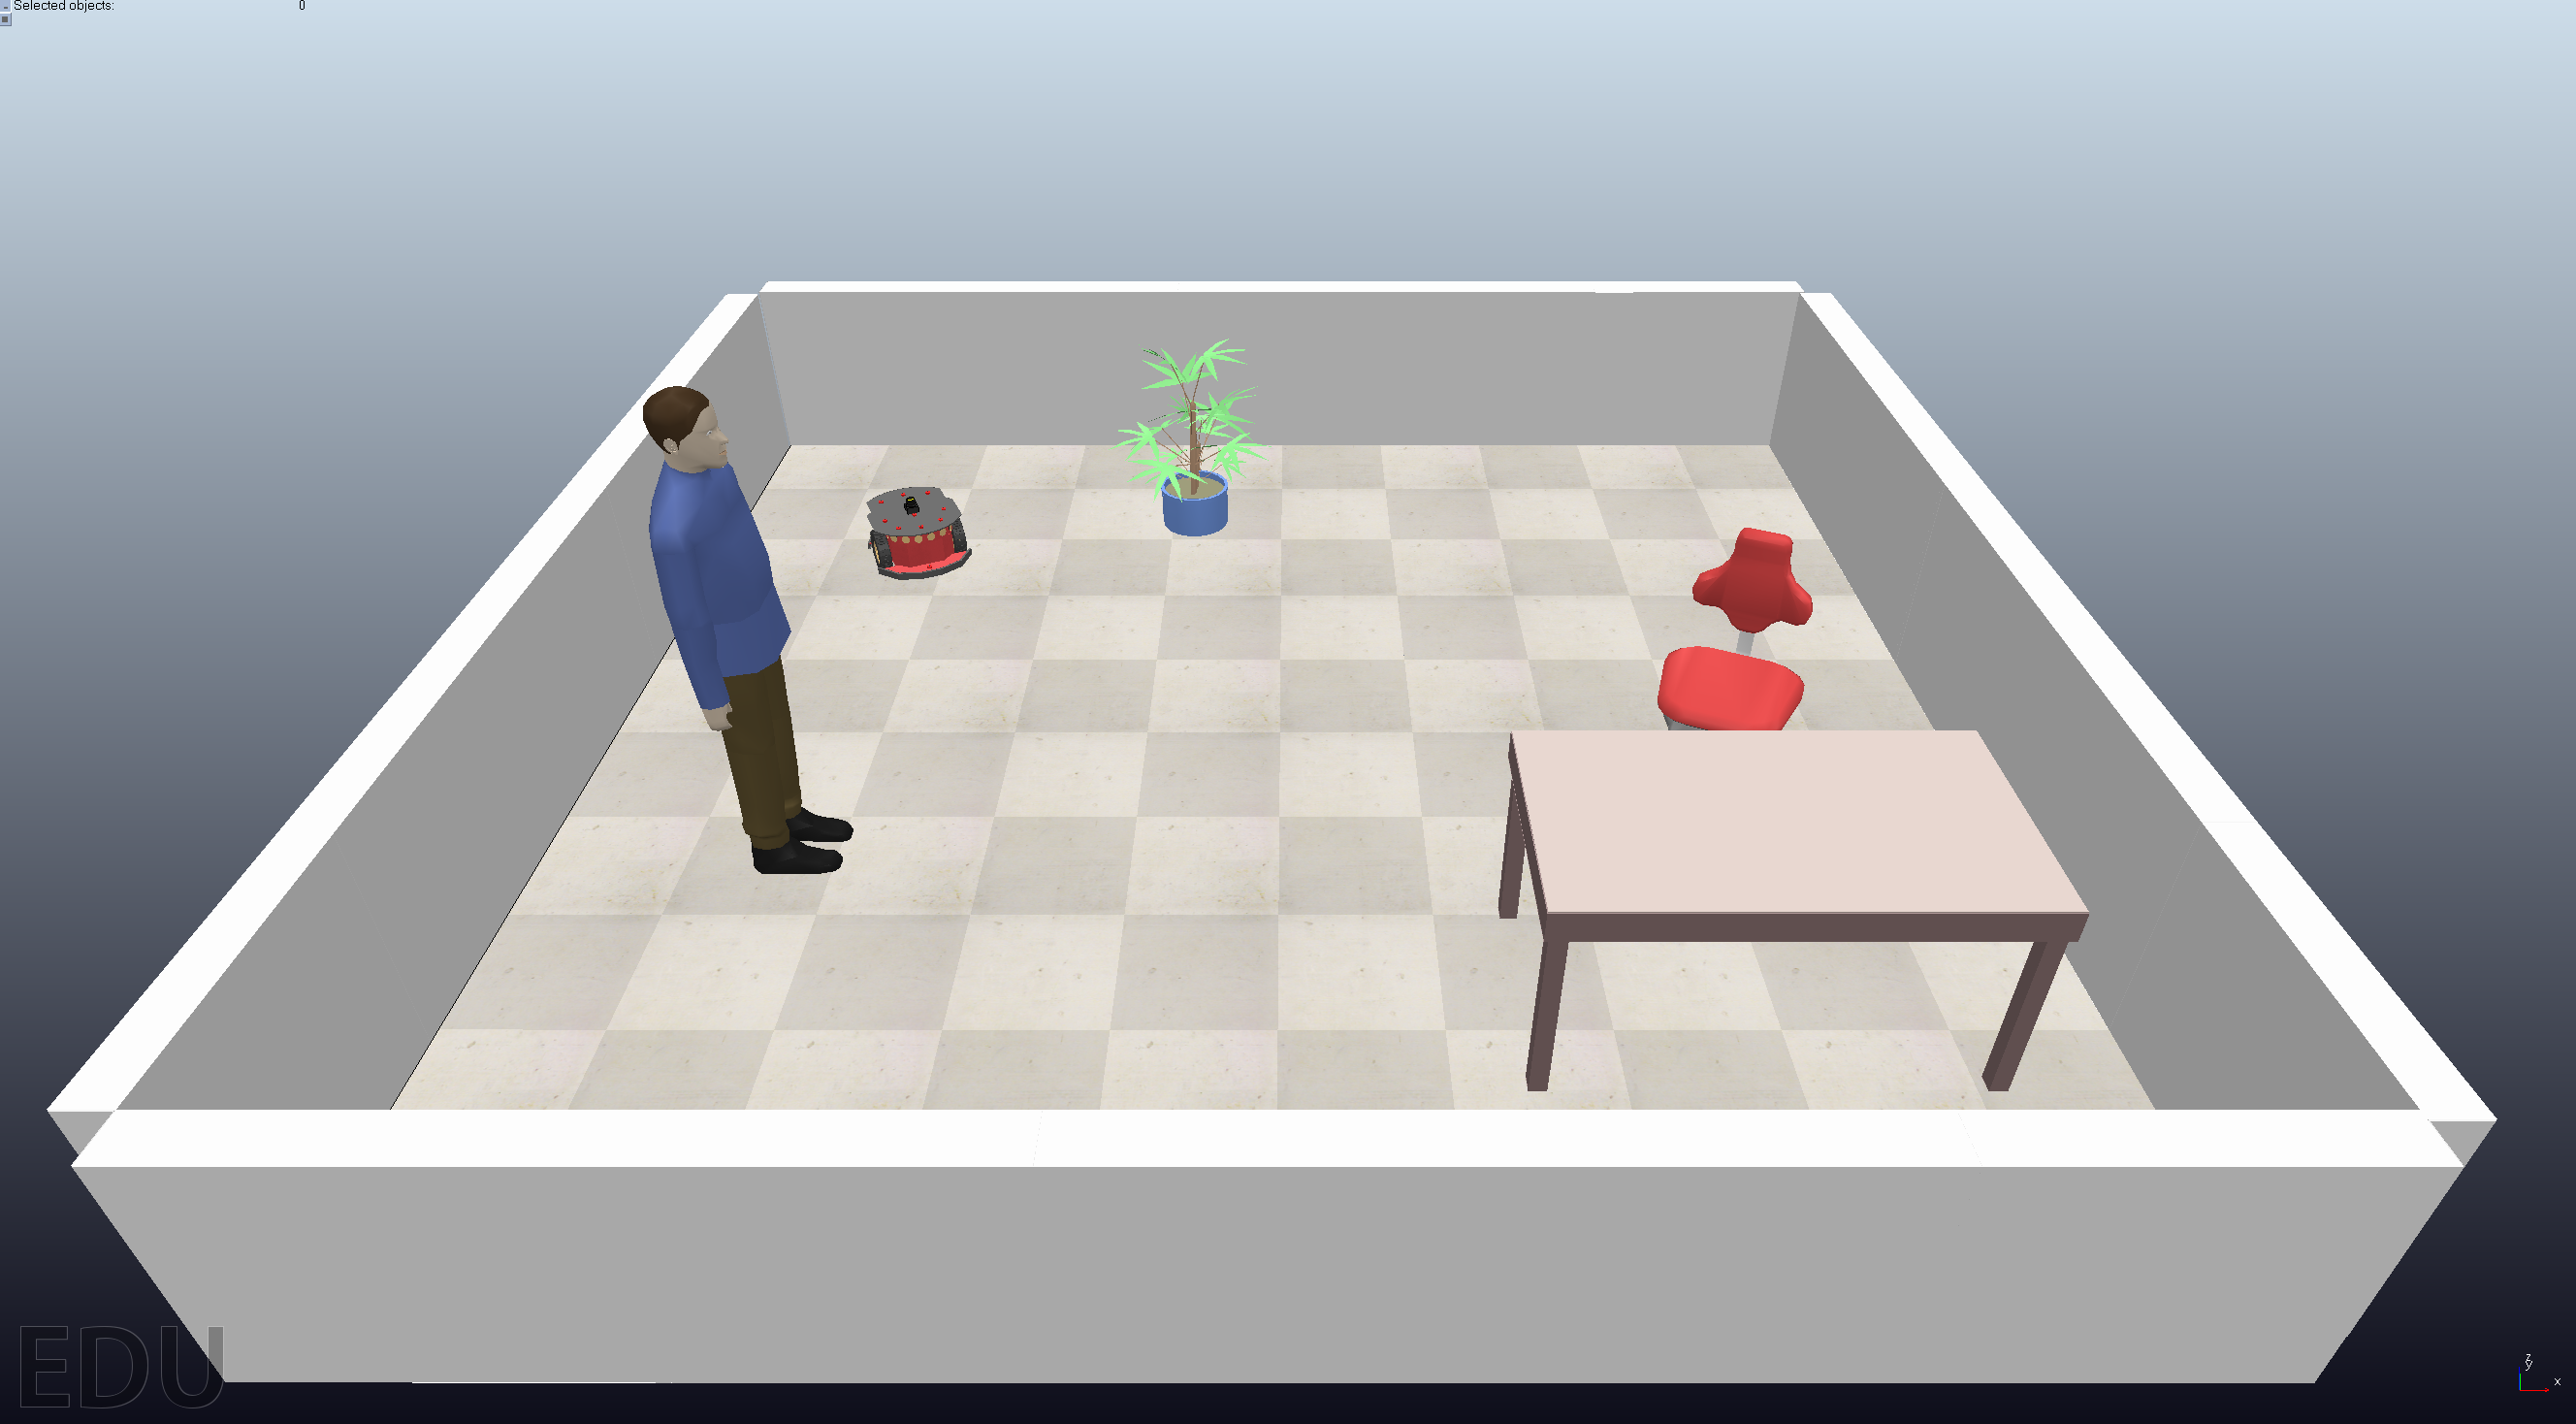

In [14]:
####################################################################################
#                                                                                  #
#                             CoppeliaSim needed first!                            #
#                                                                                  #
####################################################################################

scene_info = getObjectsPositionsAndOrientations()
if scene_info == []:
    print("ERROR: Start simulation!!!")
else:
    global_positions, positions, global_orientations, orientations = scene_info[0], scene_info[1], scene_info[2], scene_info[3]

Program started
Connected to remote API server
Program ended


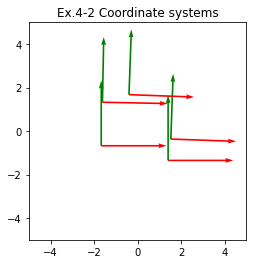

In [15]:
plotCoordinateSystem(scene_info, "Ex.4-2")

T from human to robot:
[[ 9.99803950e-01 -1.98004530e-02  5.18474137e-05  1.78942966e+00]
 [ 1.98004530e-02  9.99803952e-01 -1.16018242e-06 -8.95442903e-01]
 [-5.18142770e-05  2.18655725e-06  9.99999999e-01 -1.44166201e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from chair to robot:
[[ 9.99884035e-01  1.52287292e-02  5.20164539e-05  2.86362052e+00]
 [-1.52287291e-02  9.99884036e-01 -1.44759642e-06  2.13523293e+00]
 [-5.20324669e-05  6.55284065e-07  9.99999999e-01  3.13634396e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from table to robot:
[[ 9.99803963e-01 -1.97998164e-02  5.25912588e-05  3.70270991e+00]
 [ 1.97998165e-02  9.99803964e-01 -1.43213013e-06  1.60626459e+00]
 [-5.25525931e-05  2.47314665e-06  9.99999999e-01  5.50386846e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T from plant to robot:
[[ 9.99859664e-01  1.67525791e-02  5.19130297e-05  1.98352456e-01]
 [-1.67525790e-02  9.99859666e-01 

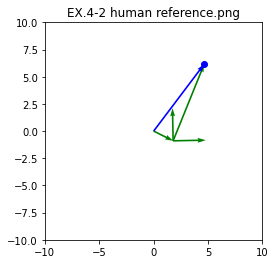

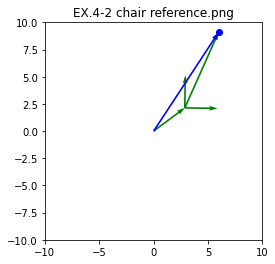

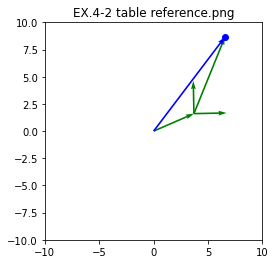

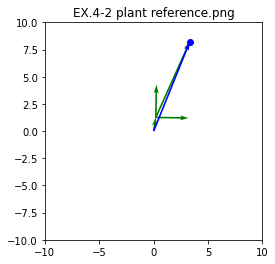

In [16]:
plotHomogeneousTransformationsAndReferences(scene_info, objects, "EX.4-2")

**EX. 5**

In [37]:
# Retorna um vetor com duas colunas: [angulo, dist]
def format_laser_data(range_data, scan_range, step_size, max_sensor_range=5):

    laser_data = []

    range_data = np.asarray(range_data)
    pts = math.floor(scan_range/step_size)
    
    # Rotacionando 90 graus
    angle =- scan_range*0.5
    for i in range(pts):
        
        dist = range_data[i]        
        if dist <= 0:
             dist = max_sensor_range
        
        laser_data.append([angle, dist])
            
        angle=angle+step_size
        
    return np.array(laser_data)
    

def draw_laser_data_wrt_world(T, laser_data, title, max_sensor_range=5):
#     this function draws the laser data into global frame wrt robot position
#     Input: 
#       T: Homogeneous transformation from laser to world wrt robot position
#       laser_data: an array made of several [ang, dist] elements
#       max_sensor_range: scalar that defines the maximum sensor range
#       title: string useful for save image
#     Output: None
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        if dist < max_sensor_range:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            # TODO
            pc = np.array([x, y, 0, 1])
            pa = T @ pc
            
            c = 'r'
            if ang < 0:    
                c = 'b'
            ax.plot(pa[0], pa[1], 'o', color=c)

    ax.plot(0, 0, 'k>', markersize=10)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])
    plt.savefig("{}.png".format(title))

Program started
Connected to remote API server
laser_data
[[-1.57079633  0.97375524]
 [-1.5646604   0.97661227]
 [-1.55852448  0.97952312]
 ...
 [ 1.55238856  2.79269361]
 [ 1.55852448  2.75529027]
 [ 1.5646604   5.        ]]
Program ended


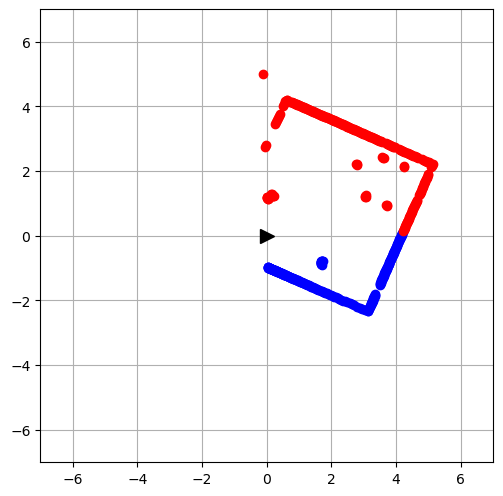

In [38]:
####################################################################################
#                                                                                  #
#                             CoppeliaSim needed first!                            #
#                                                                                  #
####################################################################################

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    # Iniciando a simulação
    # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
    # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)     
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)
    
    # Handle for Laser
    laser_name = "Hokuyo_URG_04LX_UG01_ROS_laser"
    returnCode, laserHandle = sim.simxGetObjectHandle(clientID, laser_name, sim.simx_opmode_oneshot_wait) 
    
    # Handle para os dados do LASER
    laser_data_name = "hokuyo_range_data"
    
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)
    
    # Prosseguindo com as leituras
    returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_buffer)
    raw_range_data = sim.simxUnpackFloats(string_range_data)
    
    returnCode, laser_pos_wrt_robot = sim.simxGetObjectPosition(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
    returnCode, laser_orientation_wrt_robot = sim.simxGetObjectOrientation(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
       
    returnCode, robot_pos_wrt_world = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
    returnCode, robot_orientation_wrt_world = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
    
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])
    
    # Definindo Tbc
    pb_corg = np.array(laser_pos_wrt_robot)
    alpha, beta, gamma = laser_orientation_wrt_robot
    Rbc = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
#     theta = laser_orientation_wrt_robot[2]
#     Rbc = Rz(np.deg2rad(theta))
    Tbc = np.column_stack((Rbc, pb_corg))
    Tbc = np.row_stack((Tbc, aux))
    
    # Definindo Tab
    pa_borg = np.array(robot_pos_wrt_world)
    alpha, beta, gamma = robot_orientation_wrt_world
    Rab = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
#     theta = robot_orientation_wrt_world[2]
#     Rab = Rz(np.deg2rad(theta))
    Tab = np.column_stack((Rab, pa_borg))
    Tab = np.row_stack((Tab, aux))
    
    # Definindo Tac
    Tac = Tab @ Tbc
    
    # Define T for plotting  data in the global frame according to the robot's current position
    T = np.linalg.inv(Tab) @ Tac
    
    
    #print("raw_range_data")
    #print(raw_range_data)
    #print(len(raw_range_data))
    #print(raw_range_data[0])
    
    scan_range = 180*np.pi/180
    step_size = 2*np.pi/1024
    laser_data = format_laser_data(raw_range_data, scan_range, step_size)
    
    print("laser_data")
    print(laser_data)
    draw_laser_data_wrt_world(T, laser_data, "EX.5", 7)
    

    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
       
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

**EX. 6**

Program started
Connected to remote API server
laser_data
[[-1.57079633  0.97386956]
 [-1.5646604   0.97672701]
 [-1.55852448  0.97963864]
 ...
 [ 1.55238856  2.79306078]
 [ 1.55852448  2.75565338]
 [ 1.5646604   5.        ]]
Program ended


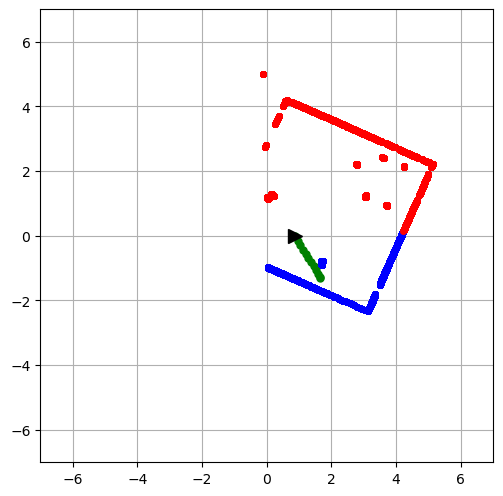

In [41]:
####################################################################################
#                                                                                  #
#                             CoppeliaSim needed first!                            #
#                                                                                  #
####################################################################################

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    # Iniciando a simulação
    # Deve usar a porta do 'continuous remote API server services' (remoteApiConnections.txt)
    # e = sim.simxStartSimulation(clientID,sim.simx_opmode_blocking)

    # Handle para o ROBÔ    
    robotname = 'Pioneer_p3dx'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)     
    
    # Handle para as juntas das RODAS
    returnCode, l_wheel = sim.simxGetObjectHandle(clientID, robotname + '_leftMotor', sim.simx_opmode_oneshot_wait)
    returnCode, r_wheel = sim.simxGetObjectHandle(clientID, robotname + '_rightMotor', sim.simx_opmode_oneshot_wait)
    
    # Handle for Laser
    laser_name = "Hokuyo_URG_04LX_UG01_ROS_laser"
    returnCode, laserHandle = sim.simxGetObjectHandle(clientID, laser_name, sim.simx_opmode_oneshot_wait) 
    
    # Handle para os dados do LASER
    laser_data_name = "hokuyo_range_data"
    
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)
    
    # Prosseguindo com as leituras
    returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_buffer)
    raw_range_data = sim.simxUnpackFloats(string_range_data)
    
    returnCode, laser_pos_wrt_robot = sim.simxGetObjectPosition(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
    returnCode, laser_orientation_wrt_robot = sim.simxGetObjectOrientation(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)        

    returnCode, robot_pos_wrt_world = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
    returnCode, robot_orientation_wrt_world = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        

    
    scan_range = 180*np.pi/180
    step_size = 2*np.pi/1024
    laser_data = format_laser_data(raw_range_data, scan_range, step_size)
    
    print("laser_data")
    print(laser_data)
#     draw_laser_data_wrt_world(Tac, laser_data, 7)

    max_sensor_range=7
    
    # Vetor auxiliar
    aux = np.array([0, 0, 0, 1])
    
    #raise SystemExit()
    
    # Dados do Pioneer
    L = 0.381   # Metros
    r = 0.0975  # Metros

    t = 0
    # Lembrar de habilitar o 'Real-time mode'
    startTime=time.time()
    lastTime = startTime
    
    fig = plt.figure(figsize=(6,6), dpi=100)
    ax = fig.add_subplot(111, aspect='equal')
    
    limit = 10

    while t < limit:
        
        now = time.time()
        dt = now - lastTime 
       

        # Definindo Tbc
        pb_corg = np.array(laser_pos_wrt_robot)
        alpha, beta, gamma = laser_orientation_wrt_robot
        Rbc = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
#         Rbc = Rz(np.deg2rad(gamma)) @ Ry(np.deg2rad(beta)) @ Rx(np.deg2rad(alpha))
    #     theta = laser_orientation_wrt_robot[2]
    #     Rbc = Rz(np.deg2rad(theta))
        Tbc = np.column_stack((Rbc, pb_corg))
        Tbc = np.row_stack((Tbc, aux))

        # Definindo Tab
        pa_borg = np.array(robot_pos_wrt_world)
        alpha, beta, gamma = robot_orientation_wrt_world
        Rab = Rx(np.deg2rad(alpha)) @ Ry(np.deg2rad(beta)) @ Rz(np.deg2rad(gamma))
#         Rab = Rz(np.deg2rad(gamma)) @ Ry(np.deg2rad(beta)) @ Rx(np.deg2rad(alpha))
    #     theta = robot_orientation_wrt_world[2]
    #     Rab = Rz(np.deg2rad(theta))
        Tab = np.column_stack((Rab, pa_borg))
        Tab = np.row_stack((Tab, aux))

        # Definindo Tac
        Tac = Tab @ Tbc

        # Define T for plotting  data in the global frame according to the robot's current position
        Tba = np.linalg.inv(Tab)
        T = Tba @ Tac
    
        laser_data = format_laser_data(raw_range_data, scan_range, step_size)
        
        for i in range(len(laser_data)):
            ang, dist = laser_data[i]
            if dist < max_sensor_range:
                x = dist * np.cos(ang)
                y = dist * np.sin(ang)
                # TODO
                pc = np.array([x, y, 0, 1])
                pa = T @ pc#############
#                 laser_data_plot.append([pa[0], pa[1]])
                c = 'r'
                if ang < 0:    
                    c = 'b'
                ax.plot(pa[0], pa[1], 'o', color=c, markersize = 4)
                
        
#         Tr = Tba @ Tab
#         robot_pos_wrt_world.append(1)
#         rob_pos =  Tr @ robot_pos_wrt_world 
        Rba = Rab.T
        rob_pos =  -Rba @ robot_pos_wrt_world

#         robot_positions.append([robot_pos_wrt_world[0], robot_pos_wrt_world[1]])

#         ax.plot(robot_pos_wrt_world[0], robot_pos_wrt_world[1], '.', color='g', markersize=6)
        ax.plot(rob_pos[0], rob_pos[1], '.', color='g', markersize=10)
        
        
        # Velocidade básica (linear, angular)
        v = 0
        w = np.deg2rad(0)      

        frente = int(len(laser_data)/2)
        lado_direito = int(len(laser_data)*1/4)
        lado_esquerdo = int(len(laser_data)*3/4)
        
        if laser_data[frente, 1] > 2:
            v = .5
            w = 0
#             w = np.deg2rad(-45)
        elif laser_data[lado_direito, 1] > 2:
            v = 0
            w = np.deg2rad(-30)
        elif laser_data[lado_esquerdo, 1] > 2:
            v = 0
            w = np.deg2rad(30)
        
        # Isso é o modelo cinemático, estudaremos detalhadamente depois!
        wl = v/r - (w*L)/(2*r)
        wr = v/r + (w*L)/(2*r)
        
        # Enviando velocidades
        sim.simxSetJointTargetVelocity(clientID, l_wheel, wl, sim.simx_opmode_streaming + 5)
        sim.simxSetJointTargetVelocity(clientID, r_wheel, wr, sim.simx_opmode_streaming + 5)        
    
        t = t + dt  
        lastTime = now
        
        if t < limit:
             # Fazendo leitura do laser       
            returnCode, string_range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_buffer)
            raw_range_data = sim.simxUnpackFloats(string_range_data)

            returnCode, laser_pos_wrt_robot = sim.simxGetObjectPosition(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)        
            returnCode, laser_orientation_wrt_robot = sim.simxGetObjectOrientation(clientID, laserHandle, robotHandle, sim.simx_opmode_oneshot_wait)        

            returnCode, robot_pos_wrt_world = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
            returnCode, robot_orientation_wrt_world = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        

        
        
#     laser_data_plot = np.asarray(laser_data_plot)
#     robot_positions = np.asarray(robot_positions)

#     draw_laser_data_wrt_world_and_path(laser_data_plot, robot_positions, 7)
    
    # plot the robot last position
    ax.plot(rob_pos[0], rob_pos[1], 'k>', markersize=10)

        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])
    plt.savefig("EX.6.png")
    
    # Parando o robô    
    sim.simxSetJointTargetVelocity(clientID, r_wheel, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, l_wheel, 0, sim.simx_opmode_oneshot_wait)        
       
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')

**CONCLUSION**

I liked very much this homework because of dealing with the CoppeliaSim robotic tool. The main difficulties I encountered are the beginning of dealing with this tool and so to understand how it works and the plot of the robot path that is not very accurate.

**BIBLIOGRAPHY**

The main resources used for this homework comes from the prof. Douglas Macharet classes of Robotica Movel and from the CoppeliaSim APIs (https://www.coppeliarobotics.com/helpFiles/en/remoteApiFunctionsPython.htm).